In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [3]:
# Read in the happy data and remove the unnecessary index
happy = pd.read_csv("http://knuth.luther.edu/~maulsy01/happy.csv")
happy = happy.drop(columns=["Unnamed: 0"])
happy.head()

,Country,Dystopia Residual,Economy (GDP per Capita),Family,Freedom,Generosity,Happiness Rank,Happiness Score,Health (Life Expectancy),Lower Confidence Interval,Region,Standard Error,Trust (Government Corruption),Upper Confidence Interval,Whisker.high,Whisker.low,Year
0,Switzerland,2.51738,1.39651,1.34951,0.66557,0.29678,1,7.587,0.94143,NaN,Western Europe,0.03411,0.41978,NaN,NaN,NaN,2015
1,Iceland,2.70201,1.30232,1.40223,0.62877,0.43630,2,7.561,0.94784,NaN,Western Europe,0.04884,0.14145,NaN,NaN,NaN,2015
2,Denmark,2.49204,1.32548,1.36058,0.64938,0.34139,3,7.527,0.87464,NaN,Western Europe,0.03328,0.48357,NaN,NaN,NaN,2015
3,Norway,2.46531,1.45900,1.33095,0.66973,0.34699,4,7.522,0.88521,NaN,Western Europe,0.03880,0.36503,NaN,NaN,NaN,2015
4,Canada,2.45176,1.32629,1.32261,0.63297,0.45811,5,7.427,0.90563,NaN,North America,0.03553,0.32957,NaN,NaN,NaN,2015


## The Top 5 Happiest Countries Over 3 Years

In [4]:
# Find the top 5 counties over the 3 years, then groupby country and count the number of times they are in the top 5 per year
top_countries = happy[happy["Happiness Rank"] <= 5]
top_countries_cnt = top_countries.groupby("Country")["Happiness Rank"].count()
top_countries_cnt

Country
Canada         1
Denmark        3
Finland        2
Iceland        3
Norway         3
Switzerland    3
Name: Happiness Rank, dtype: int64

Text(0,0.5,'Number of Appearances in Top 5')

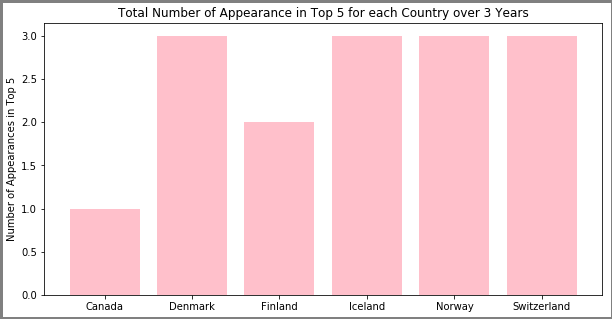

In [36]:
# Create a bar graph of the countries that show up in the top 5 from 2015-2017 and plot their number of appearances
fig, ax = plt.subplots(figsize=(10,5), linewidth=5, edgecolor='.5')
ax.bar(top_countries_cnt.index.values, top_countries_cnt.values, color="pink")
ax.set_title("Total Number of Appearance in Top 5 for each Country over 3 Years")
ax.set_ylabel('Number of Appearances in Top 5')

The figure shows that most of the countries in the top 5 remain there for all 3 years except Finland once and Canada twice.

## Regions By Categories

In [6]:
# Create a series for each category group by region and find the mean for that category in each region
family_by_region = happy.groupby('Region')['Family'].mean()
freedom_by_region = happy.groupby('Region')['Freedom'].mean()
dystopia_by_region = happy.groupby('Region')['Dystopia Residual'].mean()
economy_by_region = happy.groupby('Region')['Economy (GDP per Capita)'].mean()
health_by_region = happy.groupby('Region')['Health (Life Expectancy)'].mean()
trust_by_region = happy.groupby('Region')['Trust (Government Corruption)'].mean()
family_by_region

Region
Australia and New Zealand          1.327446
Central and Eastern Europe         1.065728
Eastern Asia                       1.079849
Latin America and Caribbean        1.092063
Middle East and Northern Africa    0.904168
North America                      1.269152
Southeastern Asia                  0.984215
Southern Asia                      0.685964
Sub-Saharan Africa                 0.786879
Unknown                            1.024953
Western Europe                     1.244900
Name: Family, dtype: float64

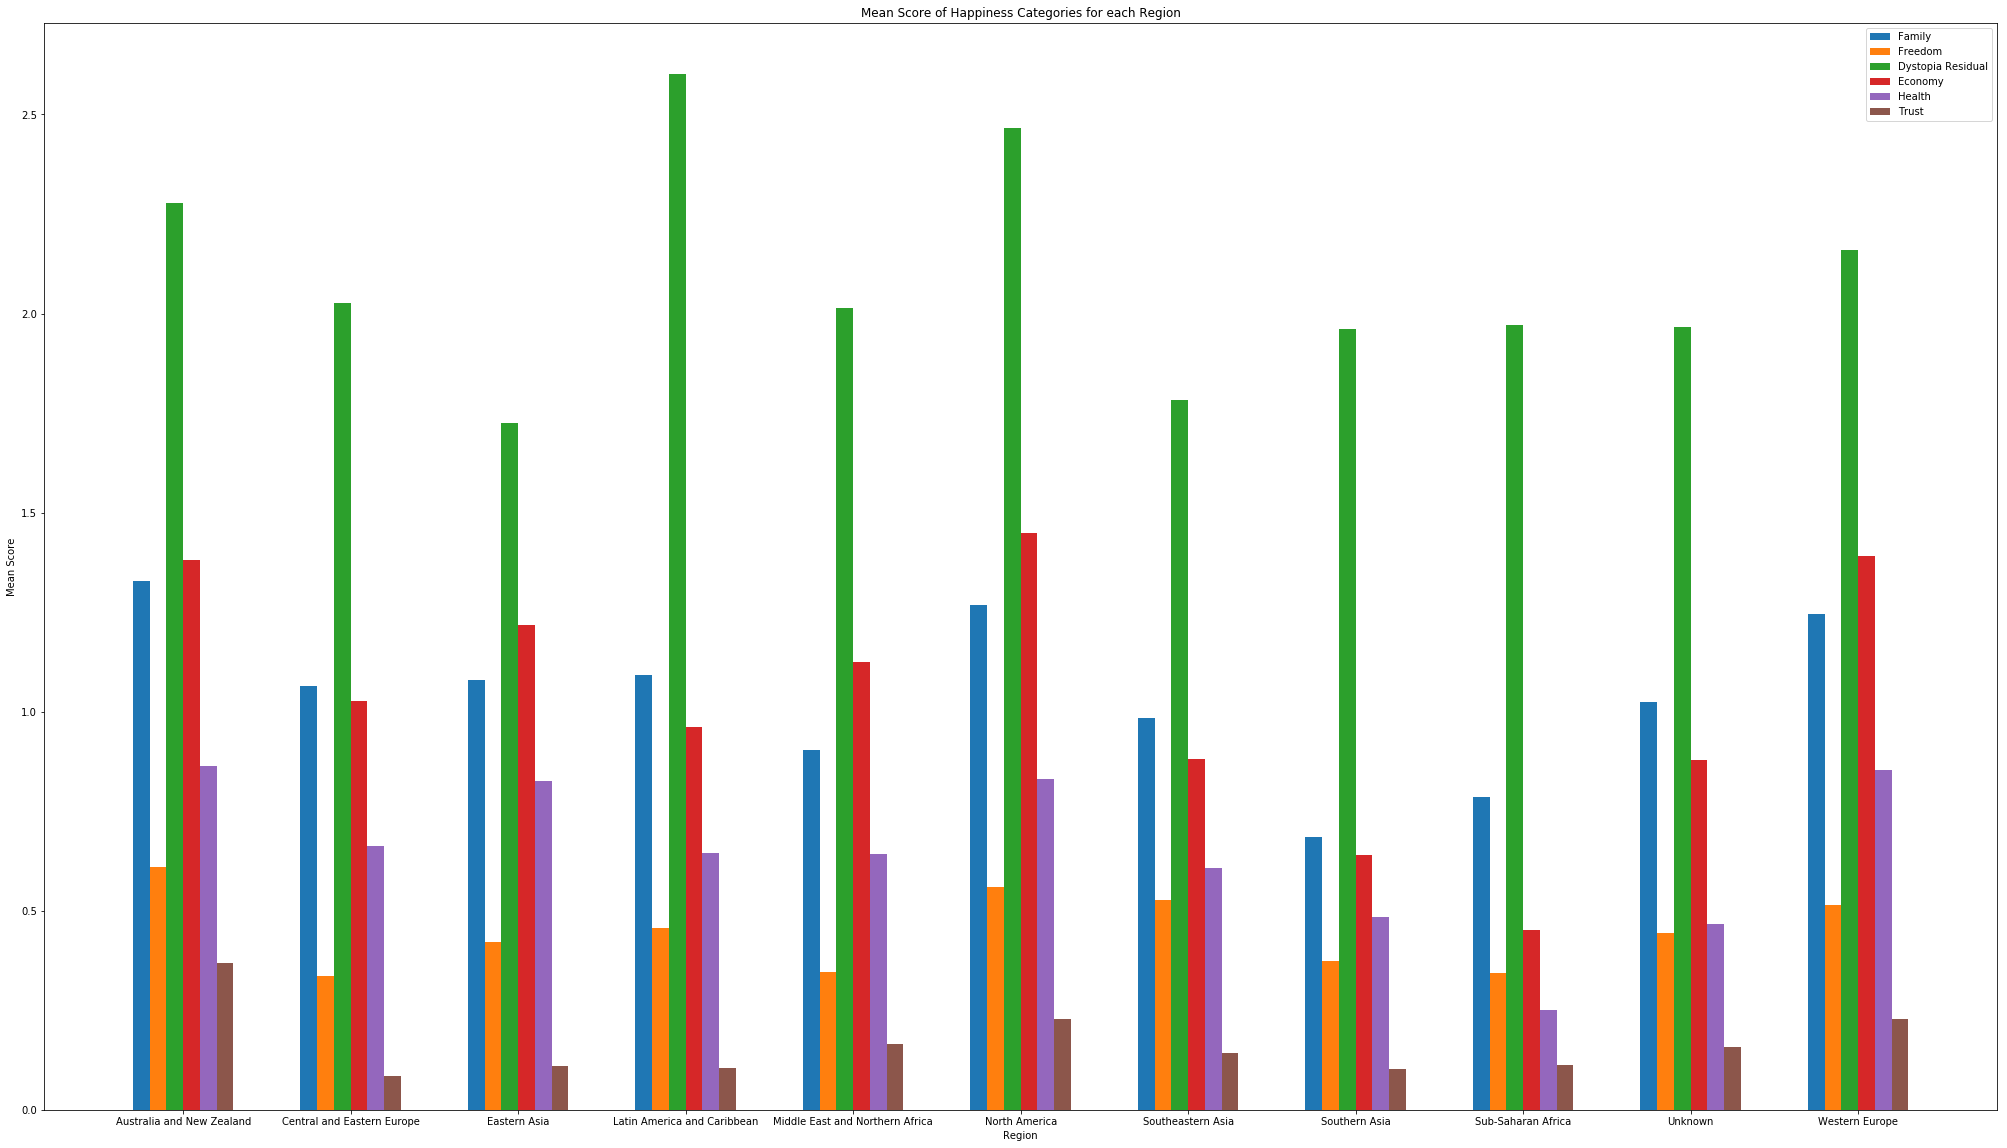

In [7]:
# Create a bar graph that uses xticks for regions and plots each category for each regions.
index = np.arange(11)
bar_width = 0.10
fig,ax = plt.subplots(figsize=(35,20))
regions = family_by_region.index.values
ax.bar(index, family_by_region, bar_width, label='Family')
ax.bar(index + bar_width, freedom_by_region, bar_width, label='Freedom')
ax.bar(index + bar_width*2, dystopia_by_region, bar_width, label='Dystopia Residual')
ax.bar(index + bar_width*3, economy_by_region, bar_width, label='Economy')
ax.bar(index + bar_width*4, health_by_region, bar_width, label='Health')
ax.bar(index + bar_width*5, trust_by_region, bar_width, label='Trust')

ax.set_xlabel('Region')
ax.set_ylabel('Mean Score')
ax.set_title('Mean Score of Happiness Categories for each Region')
ax.set_xticks(index + bar_width*5 / 2)
ax.set_xticklabels(regions)
ax.legend()

plt.show()

In [8]:
# Create a dataframe that is jsut 2015 and 2017. Then split those into two seperate series, then merge them back together.
over_years = happy[happy["Year"] != 2016]
over_years = happy[["Country", "Region", "Happiness Score", "Year"]]
series_2015 = over_years[over_years["Year"] == 2015].drop(columns="Year")
series_2017 = over_years[over_years["Year"] == 2017].drop(columns="Year")
country_change = pd.merge(series_2015, series_2017, on='Country', how='outer')

In [9]:
# Use the country_change dataframe, subtract happines score y and x, then divide it all by x and times it by 100. This gives
# the percent change for each country over the three years.
country_change["Percent Change"] = (country_change["Happiness Score_y"] - country_change["Happiness Score_x"]) / country_change["Happiness Score_x"] * 100

In [10]:
# Drop the NaN values, drop the one of the region columns, and sort by percent change
country_change = country_change.dropna().drop(columns="Region_y").sort_values(by="Percent Change", ascending=False)
country_change

,Country,Region_x,Happiness Score_x,Happiness Score_y,Percent Change
157,Togo,Sub-Saharan Africa,2.839,3.495,23.106724
141,Senegal,Sub-Saharan Africa,3.904,4.535,16.162906
155,Syria,Middle East and Northern Africa,3.006,3.462,15.169657
88,Latvia,Central and Eastern Europe,5.098,5.850,14.750881
142,Gabon,Sub-Saharan Africa,3.896,4.465,14.604727
150,Ivory Coast,Sub-Saharan Africa,3.655,4.180,14.363880
85,Romania,Central and Eastern Europe,5.124,5.825,13.680714
134,Egypt,Middle East and Northern Africa,4.194,4.735,12.899383
151,Burkina Faso,Sub-Saharan Africa,3.587,4.032,12.405912
133,Bulgaria,Central and Eastern Europe,4.218,4.714,11.759133


Text(0,0.5,'Percent Change over 2015-2017')

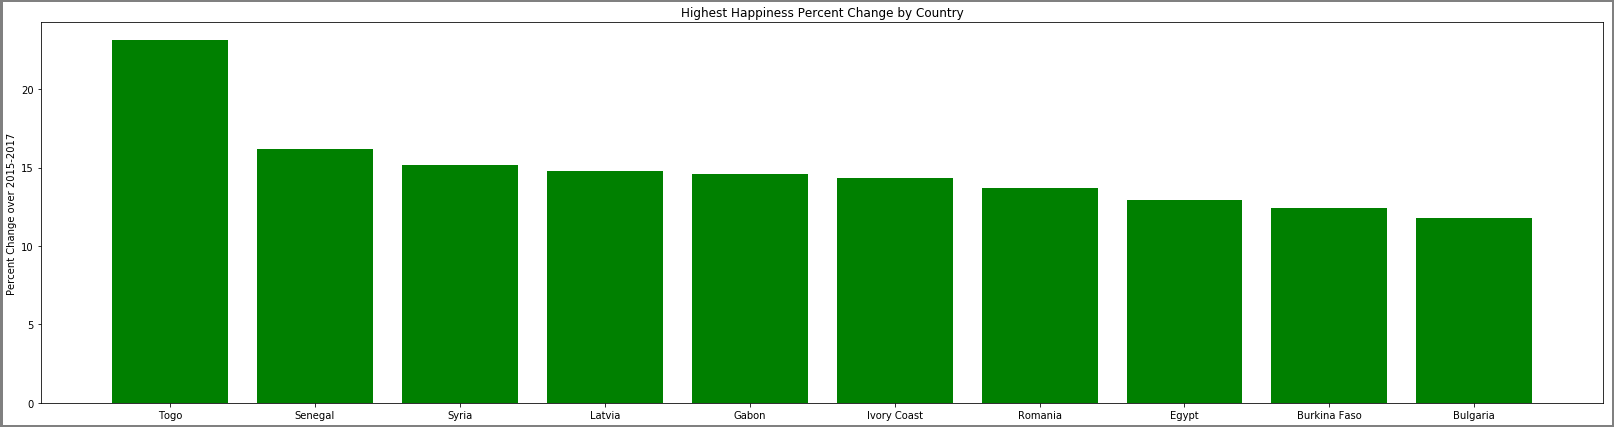

In [11]:
# Take the top 10 values and plot each country and their percent change on a bar graph.
top_growth = country_change.head(10)
fig, ax = plt.subplots(figsize=(28,7), linewidth=5, edgecolor='.5')
ax.bar(top_growth["Country"], top_growth["Percent Change"].values, color="green")
ax.set_title("Highest Happiness Percent Change by Country")
ax.set_ylabel('Percent Change over 2015-2017')

Togo had a very large increase compared to all the others. The other countries all still have a large percent increase of around 14 %.

In [12]:
# I made country_change descending to find the least growth in percent change for countries.
least_growth = country_change.sort_values(by="Percent Change", ascending=True).head(10)
least_growth

,Country,Region_x,Happiness Score_x,Happiness Score_y,Percent Change
147,Central African Republic,Sub-Saharan Africa,3.678,2.693,-26.780857
22,Venezuela,Latin America and Caribbean,6.810,5.250,-22.907489
115,Liberia,Sub-Saharan Africa,4.571,3.533,-22.708379
96,Lesotho,Sub-Saharan Africa,4.898,3.808,-22.253979
118,Haiti,Latin America and Caribbean,4.518,3.603,-20.252326
114,Zimbabwe,Sub-Saharan Africa,4.610,3.875,-15.943601
127,Botswana,Sub-Saharan Africa,4.332,3.766,-13.065558
110,Ukraine,Central and Eastern Europe,4.681,4.096,-12.497325
84,Zambia,Sub-Saharan Africa,5.129,4.514,-11.990643
135,Yemen,Middle East and Northern Africa,4.077,3.593,-11.871476


Text(0,0.5,'Percent Change over 2015-2017')

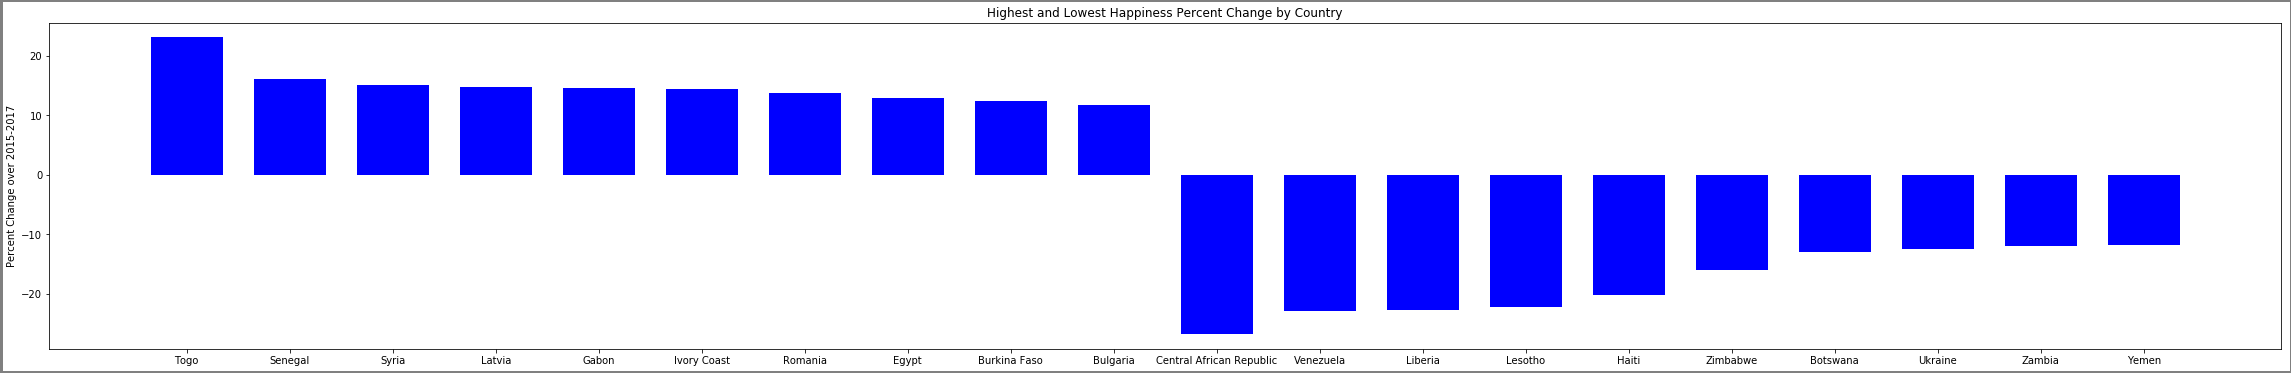

In [40]:
# I concantenated the top growth and least growth into one series, and then plotted it all on a bar graph to show the variation.
top_least_growth = pd.concat([top_growth, least_growth])
fig, ax = plt.subplots(figsize=(40,6), linewidth=5, edgecolor='.5')
ax.bar(top_least_growth["Country"], top_least_growth["Percent Change"].values, color="blue", width=0.7)
ax.set_title("Highest and Lowest Happiness Percent Change by Country")
ax.set_ylabel('Percent Change over 2015-2017')

The countries with the least growth over the 3 years seem to be a large decrease than the top growth is for an increase. Interestingly, many of the countries in both the top growth and least growth are in Africa. 

In [14]:
# I created a series grouping by region to find the average percent change in each region
region_change = country_change.groupby("Region_x")["Percent Change"].mean()
region_change

Region_x
Australia and New Zealand          0.192150
Central and Eastern Europe         1.590365
Eastern Asia                       0.172622
Latin America and Caribbean       -2.809406
Middle East and Northern Africa    1.273373
North America                     -1.632229
Southeastern Asia                  1.933190
Southern Asia                      1.362282
Sub-Saharan Africa                -1.143000
Western Europe                     0.375471
Name: Percent Change, dtype: float64

Text(0.5,0,'Regions')

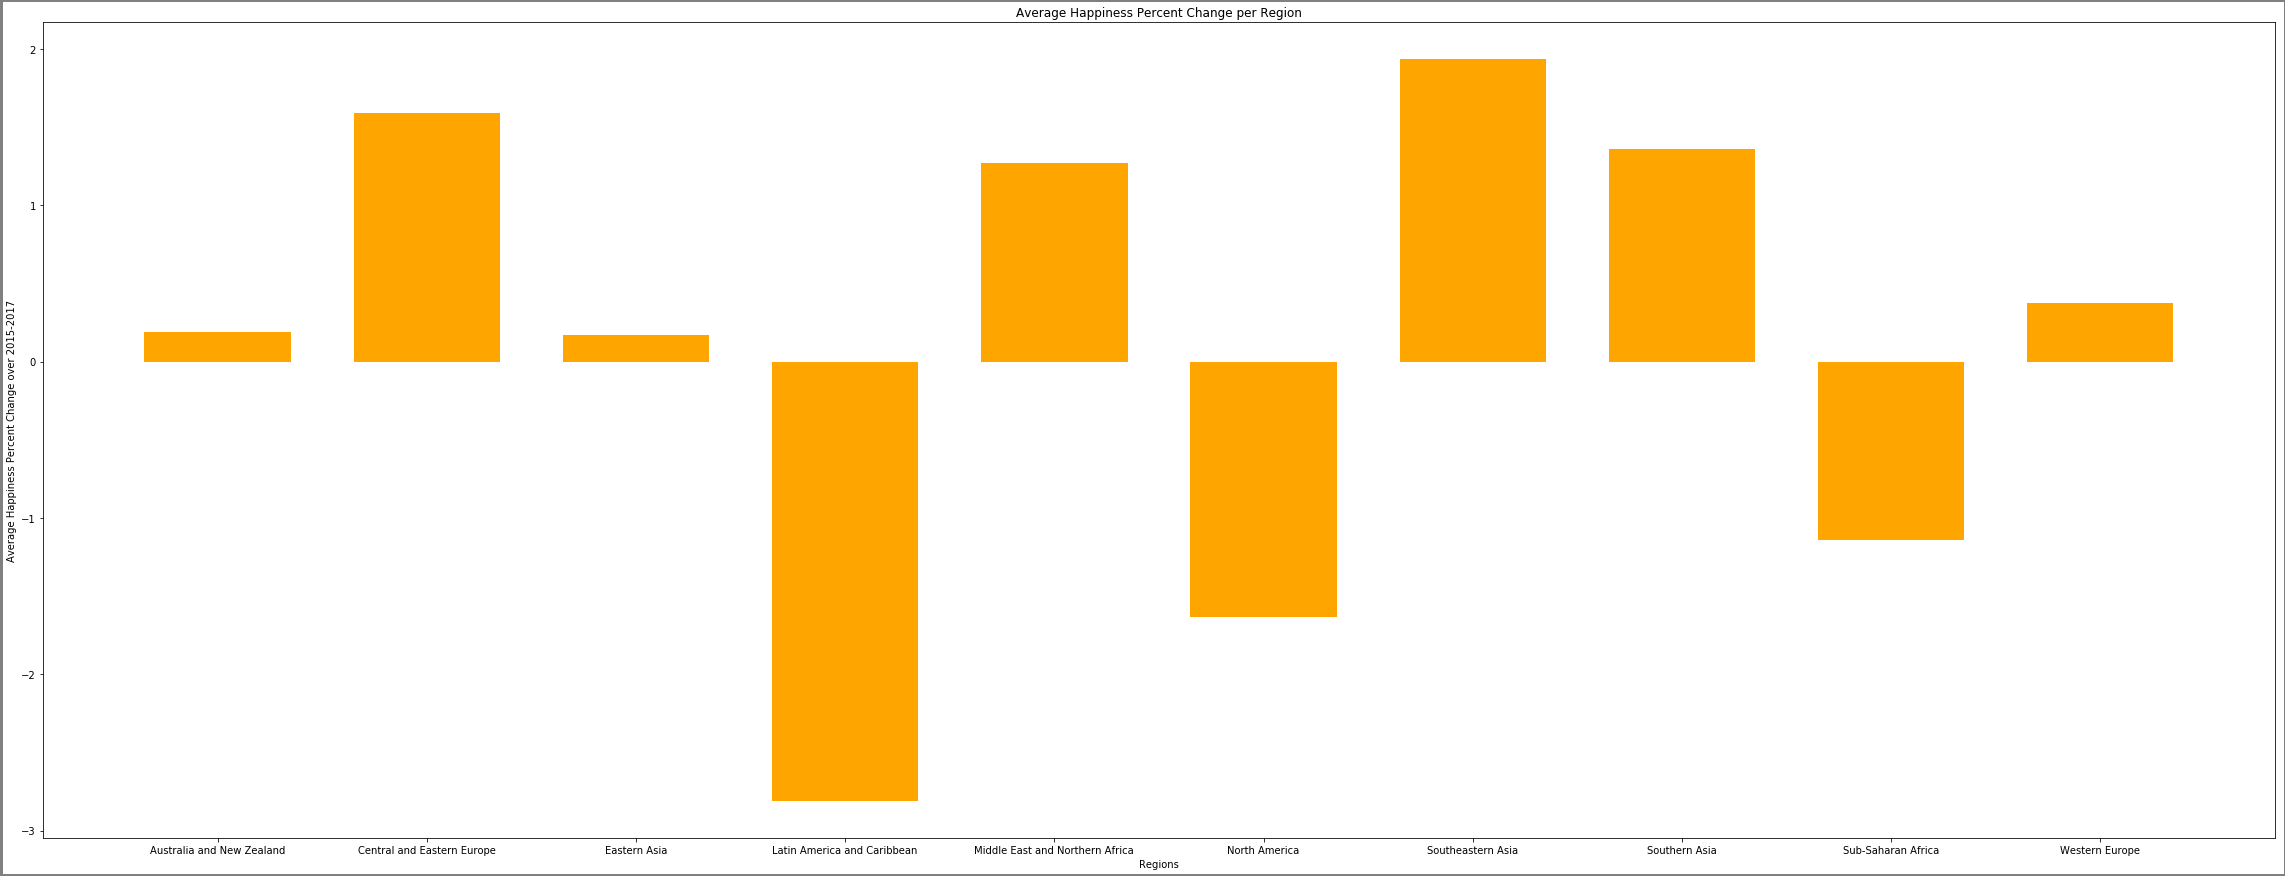

In [15]:
# I created a bar graph to show the variation of mean percent change in each region.
fig, ax = plt.subplots(figsize=(40,15), linewidth=5, edgecolor='.5')
ax.bar(region_change.index.values, region_change.values, color="orange", width=0.7)
ax.set_title("Average Happiness Percent Change per Region")
ax.set_ylabel('Average Happiness Percent Change over 2015-2017')
ax.set_xlabel("Regions")

Australia and New Zealand, Eastern Asia, and Western Europe all seem to have increased slightly, but by not that much. Latin America and Caribbean drastically decreased compared to the other countries, while Southeastern Asia had the largest growth in happiness over the 3 years.

In [16]:
# Show Regions
regions

array(['Australia and New Zealand', 'Central and Eastern Europe',
       'Eastern Asia', 'Latin America and Caribbean',
       'Middle East and Northern Africa', 'North America',
       'Southeastern Asia', 'Southern Asia', 'Sub-Saharan Africa',
       'Unknown', 'Western Europe'], dtype=object)

In [17]:
# Create a series for each region in country change, and make the values the percent change
region1 = pd.Series(country_change[country_change["Region_x"] =="Australia and New Zealand"]["Percent Change"])
region2 = pd.Series(country_change[country_change["Region_x"] =="Central and Eastern Europe"]["Percent Change"])
region3 = pd.Series(country_change[country_change["Region_x"] =="Eastern Asia"]["Percent Change"])
region4 = pd.Series(country_change[country_change["Region_x"] =="Latin America and Caribbean"]["Percent Change"])
region5 = pd.Series(country_change[country_change["Region_x"] =="Middle East and Northern Africa"]["Percent Change"])
region6 = pd.Series(country_change[country_change["Region_x"] =="North America"]["Percent Change"])
region7 = pd.Series(country_change[country_change["Region_x"] =="Southeastern Asia"]["Percent Change"])
region8 = pd.Series(country_change[country_change["Region_x"] =="Southern Asia"]["Percent Change"])
region9 = pd.Series(country_change[country_change["Region_x"] =="Sub-Saharan Africa"]["Percent Change"])
region10 = pd.Series(country_change[country_change["Region_x"] =="Unknown"]["Percent Change"])
region11 = pd.Series(country_change[country_change["Region_x"] =="Western Europe"]["Percent Change"])

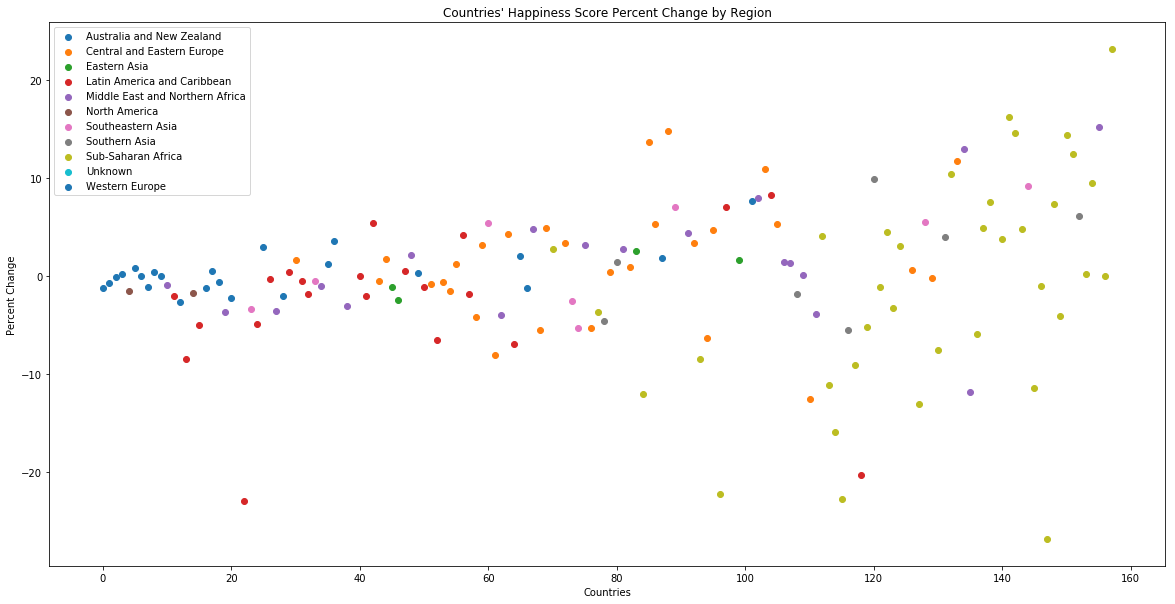

In [18]:
# Create a scatter plot that plots a point for each country, labels it depending on the region, and plots it based on its
# average percent change of happiness over 3 years
fig,ax = plt.subplots(figsize=(20,10))
ax.scatter(region1.index.values, region1, label='Australia and New Zealand')
ax.scatter(region2.index.values, region2, label='Central and Eastern Europe')
ax.scatter(region3.index.values, region3, label='Eastern Asia')
ax.scatter(region4.index.values, region4, label='Latin America and Caribbean')
ax.scatter(region5.index.values, region5, label='Middle East and Northern Africa')
ax.scatter(region6.index.values, region6, label='North America')
ax.scatter(region7.index.values, region7, label='Southeastern Asia')
ax.scatter(region8.index.values, region8, label='Southern Asia')
ax.scatter(region9.index.values, region9, label='Sub-Saharan Africa')
ax.scatter(region10.index.values, region10, label='Unknown')
ax.scatter(region11.index.values, region11, label='Western Europe')

ax.set_xlabel('Countries')
ax.set_ylabel('Percent Change')
ax.set_title("Countries' Happiness Score Percent Change by Region")
ax.legend()

Western Europe seems to be relatively stable when it comes to percent change. However, Sub-Saharan Africa seems to change drastically with some countries with high percent changes, and some countries with the complete opposite change. 

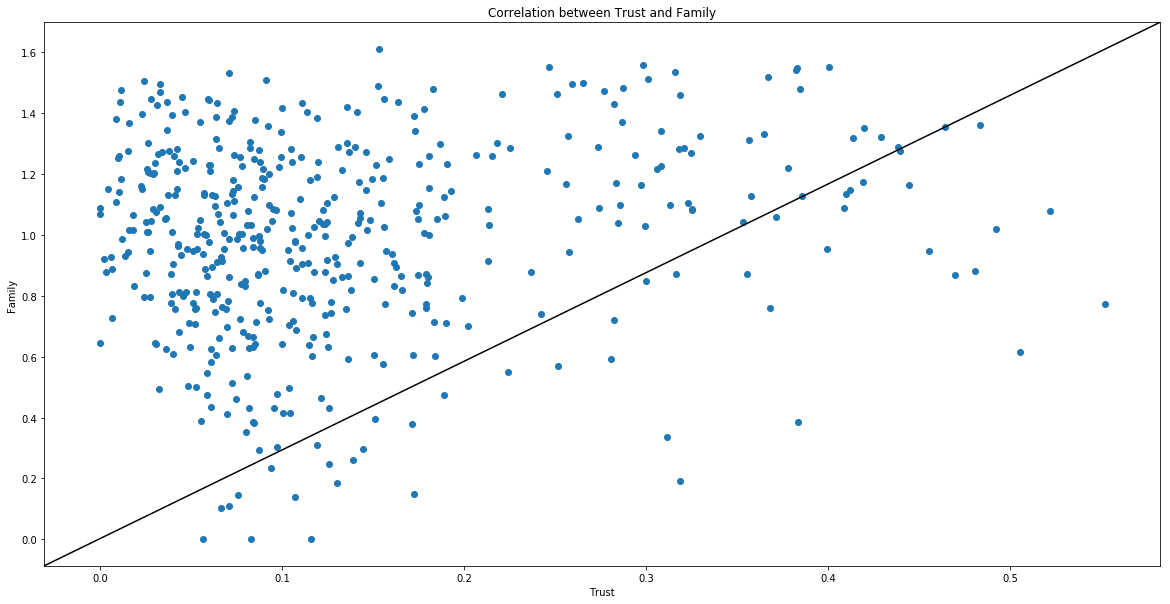

In [19]:
# Create a correlation graph between trust an family for each country.
import matplotlib.lines as mlines
import matplotlib.transforms as mtransforms

trust_family = pd.Series(happy["Family"].values, index=happy["Trust (Government Corruption)"].values)
fig,ax = plt.subplots(figsize=(20,10))

lineStart = trust_family.index.values.min() 
lineEnd = trust_family.index.values.max() 

ax.scatter(trust_family.index.values, trust_family.values)
ax.set_xlabel('Trust')
ax.set_ylabel('Family')
ax.set_title("Correlation between Trust and Family")
line = mlines.Line2D([0, 1], [0, 1], color='black')
transform = ax.transAxes
line.set_transform(transform)
ax.add_line(line)
plt.show()

In [20]:
# Create seperate series for each category by grouping by year to get the average score for each category per year.
family_by_year = happy.groupby('Year')['Family'].mean()
freedom_by_year = happy.groupby('Year')['Freedom'].mean()
dystopia_by_year = happy.groupby('Year')['Dystopia Residual'].mean()
economy_by_year = happy.groupby('Year')['Economy (GDP per Capita)'].mean()
health_by_year = happy.groupby('Year')['Health (Life Expectancy)'].mean()
trust_by_year = happy.groupby('Year')['Trust (Government Corruption)'].mean()

Text(0.5,0,'Year')

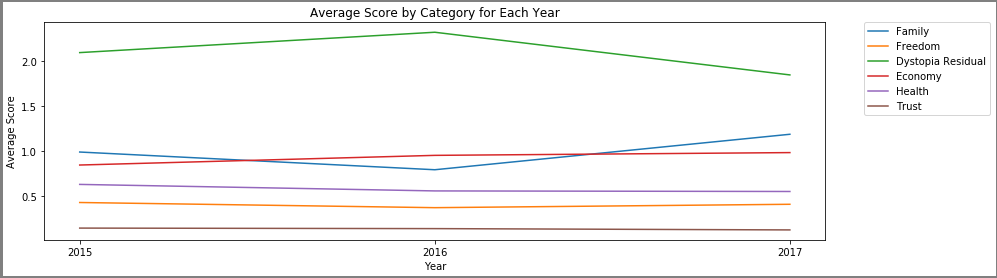

In [21]:
# Created a plot of the average score for each category over 3 years
fig, ax = plt.subplots(figsize=(14,4), linewidth=5, edgecolor='.5')
ax.plot(family_by_year.index.values, family_by_year.values, label="Family")
ax.plot(family_by_year.index.values, freedom_by_year.values, label="Freedom")
ax.plot(family_by_year.index.values, dystopia_by_year.values, label="Dystopia Residual")
ax.plot(family_by_year.index.values, economy_by_year.values, label="Economy")
ax.plot(family_by_year.index.values, health_by_year.values, label="Health")
ax.plot(family_by_year.index.values, trust_by_year.values, label="Trust")
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
plt.xticks([2015, 2016, 2017])
ax.set_ylabel('Average Score')
ax.set_title('Average Score by Category for Each Year')
ax.set_xlabel('Year')

Dystopia Residual went up in 2016 but dropped down in 2017, whereas family went down in 2016 but back up in 2017. Economy has slightly gone up over the years, but other than that the other categories are almost linear.

In [22]:
# I made a series for each category, grouping by Happiness Rank and finding the mean of the category for every rank.
family_by_rank = happy.groupby('Happiness Rank')['Family'].mean()
freedom_by_rank = happy.groupby('Happiness Rank')['Freedom'].mean()
dystopia_by_rank = happy.groupby('Happiness Rank')['Dystopia Residual'].mean()
economy_by_rank = happy.groupby('Happiness Rank')['Economy (GDP per Capita)'].mean()
health_by_rank = happy.groupby('Happiness Rank')['Health (Life Expectancy)'].mean()
trust_by_rank = happy.groupby('Happiness Rank')['Trust (Government Corruption)'].mean()

Text(0.5,0,'Happiness Rank')

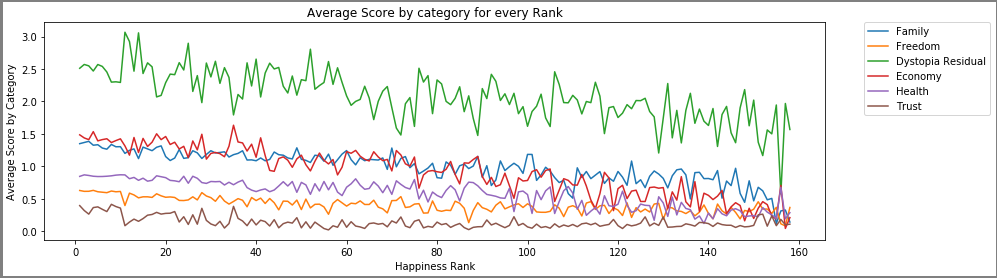

In [23]:
# Created a plot to show happiness rank's mean score for each category over 3 years
fig, ax = plt.subplots(figsize=(14,4), linewidth=5, edgecolor='.5')
ax.plot(family_by_rank.index.values, family_by_rank.values, label="Family")
ax.plot(family_by_rank.index.values, freedom_by_rank.values, label="Freedom")
ax.plot(family_by_rank.index.values, dystopia_by_rank.values, label="Dystopia Residual")
ax.plot(family_by_rank.index.values, economy_by_rank.values, label="Economy")
ax.plot(family_by_rank.index.values, health_by_rank.values, label="Health")
ax.plot(family_by_rank.index.values, trust_by_rank.values, label="Trust")
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
ax.set_title('Average Score by category for every Rank')
ax.set_ylabel('Average Score by Category')
ax.set_xlabel('Happiness Rank')

There is a lot more variation in the line for some of the ranks than what one would assume over three years. Of course, the general trends moves down as Happiness Rank gets larger. 

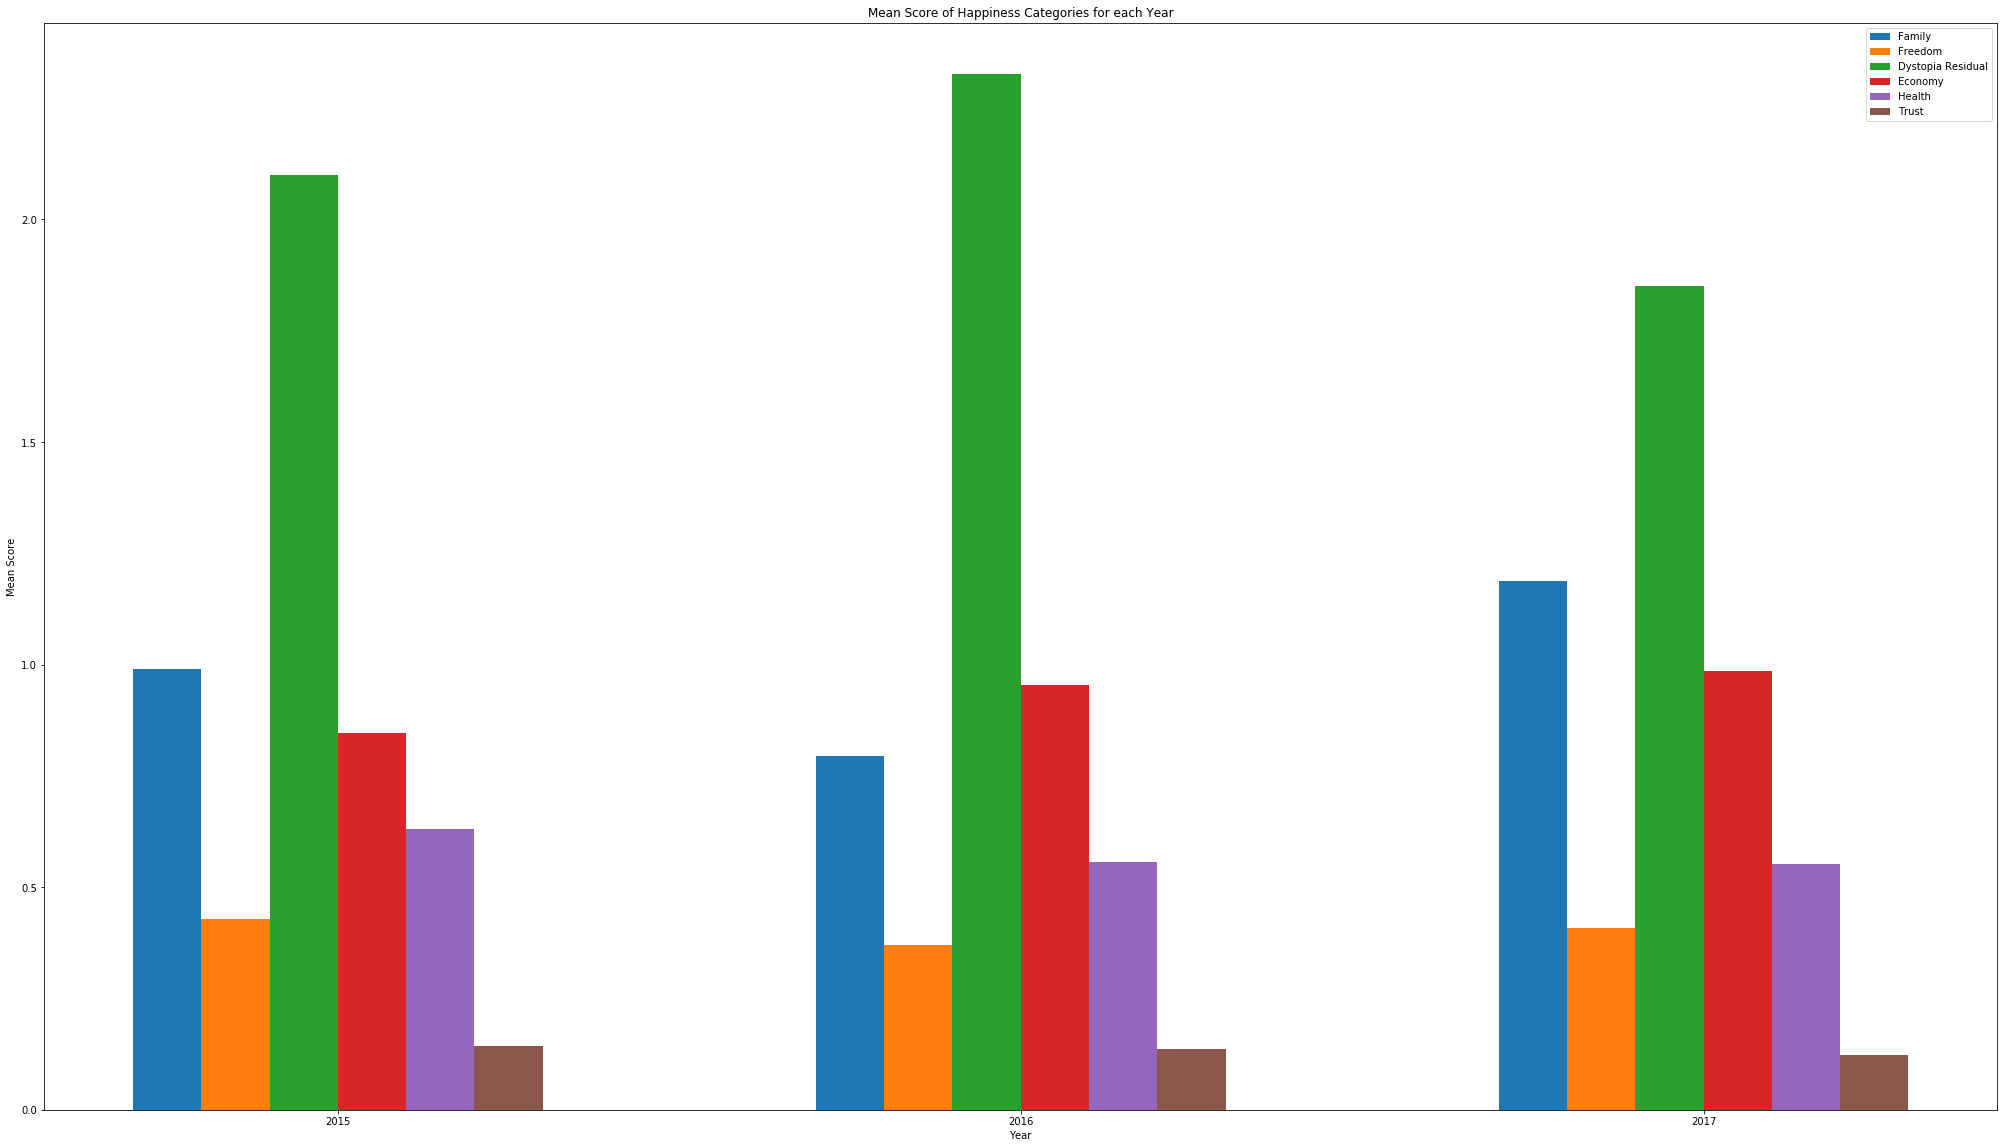

In [24]:
# Create a plot to show each year's average score in each category
index = np.arange(3)
bar_width = 0.10
fig,ax = plt.subplots(figsize=(35,20))
regions = family_by_year.index.values
ax.bar(index, family_by_year, bar_width, label='Family')
ax.bar(index + bar_width, freedom_by_year, bar_width, label='Freedom')
ax.bar(index + bar_width*2, dystopia_by_year, bar_width, label='Dystopia Residual')
ax.bar(index + bar_width*3, economy_by_year, bar_width, label='Economy')
ax.bar(index + bar_width*4, health_by_year, bar_width, label='Health')
ax.bar(index + bar_width*5, trust_by_year, bar_width, label='Trust')

ax.set_xlabel('Year')
ax.set_ylabel('Mean Score')
ax.set_title('Mean Score of Happiness Categories for each Year')
ax.set_xticks(index + bar_width*5 / 2)
ax.set_xticklabels(regions)
ax.legend()

plt.show()

Over the years, dystopia residual has moved down, while family has increased. Other than that, the general shape for each years remains similiar.

In [25]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

In [26]:
# Create interactive plot for each region and the differing categories
def f(x):
    fig,ax = plt.subplots(figsize=(35,15))
    ax.set_xlabel('Region')
    ax.set_ylabel('Mean Score')
    if x == 0:
        ax.bar(family_by_region.index.values, family_by_region)
    elif x == 1:
        ax.bar(freedom_by_region.index.values, freedom_by_region)
    elif x == 2:
        ax.bar(dystopia_by_region.index.values, dystopia_by_region)
    elif x == 3:
        ax.bar(economy_by_region.index.values, economy_by_region)
    elif x == 4:
        ax.bar(health_by_region.index.values, health_by_region)
    else:
        ax.bar(trust_by_region.index.values, trust_by_region)

category = {"Family":0, "Freedom":1, "Dystopia Residual":2, "Economy":3, "Health":4, "Trust":5}
interact(f, x=category)

interactive(children=(Dropdown(description='x', options={'Dystopia Residual': 2, 'Freedom': 1, 'Health': 4, 'Trust': 5, 'Family': 0, 'Economy': 3}, value=2), Output()), _dom_classes=('widget-interact',))

<function __main__.f(x)>

In [27]:
def f(Australia_New_Zealand, Central_Europe, Eastern_Asia, Latin_America, Middle_East, North_America, Southeastern_Asia, Southern_Asia, Sub_Saharan, Unknown, Western_Europe):
    fig,ax = plt.subplots(figsize=(20,10))
    ax.set_xlabel('Countries')
    ax.set_ylabel('Percent CSouthern_Asiaange')
    ax.set_title("Countries' Percent Change by Region")
    if Australia_New_Zealand:
        ax.scatter(region1.index.values, region1, label='Australia and New Zealand')
    if Central_Europe:
        ax.scatter(region2.index.values, region2, label='Central and Eastern Europe')
    if Eastern_Asia:
        ax.scatter(region3.index.values, region3, label='Eastern Asia')
    if Latin_America:
        ax.scatter(region4.index.values, region4, label='Latin America and Caribbean')
    if Middle_East:
        ax.scatter(region5.index.values, region5, label='Middle East and Northern Africa')
    if North_America:
        ax.scatter(region6.index.values, region6, label='North America')
    if Southeastern_Asia:
        ax.scatter(region7.index.values, region7, label='Southeastern Asia')
    if Southern_Asia:
        ax.scatter(region8.index.values, region8, label='Southern Asia')
    if Sub_Saharan:
        ax.scatter(region9.index.values, region9, label='Sub-Saharan Africa')
    if Unknown:
        ax.scatter(region10.index.values, region10, label='Unknown')
    if Western_Europe:
        ax.scatter(region11.index.values, region11, label='Western Europe')
    ax.legend()
interact(f, Australia_New_Zealand=True, Central_Europe=True, Eastern_Asia=True, Latin_America=True, Middle_East=True, \
         North_America=True, Southeastern_Asia=True, Southern_Asia=True, Sub_Saharan=True, Unknown=True, Western_Europe=True)

interactive(children=(Checkbox(value=True, description='Australia_New_Zealand'), Checkbox(value=True, description='Central_Europe'), Checkbox(value=True, description='Eastern_Asia'), Checkbox(value=True, description='Latin_America'), Checkbox(value=True, description='Middle_East'), Checkbox(value=True, description='North_America'), Checkbox(value=True, description='Southeastern_Asia'), Checkbox(value=True, description='Southern_Asia'), Checkbox(value=True, description='Sub_Saharan'), Checkbox(value=True, description='Unknown'), Checkbox(value=True, description='Western_Europe'), Output()), _dom_classes=('widget-interact',))

<function __main__.f(Australia_New_Zealand, Central_Europe, Eastern_Asia, Latin_America, Middle_East, North_America, Southeastern_Asia, Southern_Asia, Sub_Saharan, Unknown, Western_Europe)>

In [29]:
# Creat series to show mean happiness over the years
happiness_by_year = happy.groupby('Year')['Happiness Score'].mean()

Text(0.5,0,'Year')

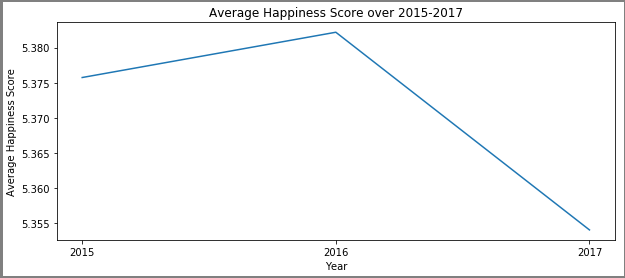

In [32]:
fig, ax = plt.subplots(figsize=(10,4), linewidth=5, edgecolor='.5')
ax.plot(happiness_by_year.index.values, happiness_by_year.values, label="Family")
plt.xticks([2015, 2016, 2017])
ax.set_title('Average Happiness Score over 2015-2017')
ax.set_ylabel('Average Happiness Score')
ax.set_xlabel('Year')

Happiness Score goes up in 2016, but ends up dropping in 2017. However, this drop is only 0.03 decrease.